In [9]:
import pandas as pd
import numpy as np
import networkx as nx
from community import community_louvain
import math
import matplotlib.pyplot as plt
from networkx.algorithms import approximation


In [10]:
edges = pd.read_csv("test.csv", usecols=['from_address', 'to_address'])
G = nx.from_pandas_edgelist(edges, source='from_address', target='to_address', create_using=nx.DiGraph())

In [11]:
# Esto es para el caso en que se quiera agarrar solo una parte del grafo

# num_filas_total = sum(1 for _ in open("test.csv", 'r'))

# # Calcula el número de filas que representan aproximadamente el 33%
# porcentaje_lectura = 10
# num_filas_a_leer = int(num_filas_total * porcentaje_lectura / 100)

# # Crea un objeto DataFrame leyendo solo las primeras filas
# df = pd.read_csv("test.csv", nrows=num_filas_a_leer)
# G2 = nx.from_pandas_edgelist(df, source='from_address', target='to_address', create_using=nx.DiGraph())

# Cantidad de nodos

In [12]:
total_nodes = G.number_of_nodes()
total_nodes

907138

# Cantidad de aristas

In [13]:
total_edges = G.number_of_edges()
total_edges

1248500

# Distribución de grados

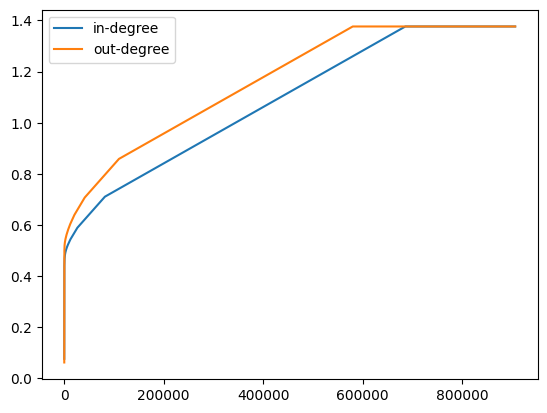

In [14]:
in_degree_values = [G.in_degree(n) for n in G.nodes]
out_degree_values = [G.out_degree(n) for n in G.nodes]

in_degree_values = sorted(in_degree_values, reverse=True)
out_degree_values = sorted(out_degree_values, reverse=True)

in_degree_values = np.array(in_degree_values)
out_degree_values = np.array(out_degree_values)

in_degree_values = in_degree_values / total_nodes
out_degree_values = out_degree_values / total_nodes

in_degree_values = np.cumsum(in_degree_values)
out_degree_values = np.cumsum(out_degree_values)

plt.plot(in_degree_values, label='in-degree')
plt.plot(out_degree_values, label='out-degree')
plt.legend()
plt.show()

# Diametro  

In [15]:
#diameter = nx.diameter(G)
#diameter
# Found infinite path length because the digraph is not strongly connected

# Centralidad

In [16]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality = sorted(betweenness_centrality.values(), reverse=True)
betweenness_centrality = np.array(betweenness_centrality)
betweenness_centrality = betweenness_centrality / total_nodes
betweenness_centrality = np.cumsum(betweenness_centrality)

plt.plot(betweenness_centrality, label='betweenness centrality')
plt.legend()
plt.show()

# Page Rank


PageRank es un algoritmo de clasificación de páginas web desarrollado por Google que se utiliza para medir la importancia relativa de los nodos en una red. En términos simples, PageRank asigna un valor numérico a cada nodo en función de la cantidad y calidad de los enlaces que apuntan a ese nodo. 

In [ ]:
pagerank = nx.pagerank(G)

sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

top_15_pagerank = sorted_pagerank[:15]

for node, value in top_15_pagerank:
    print(f"Nodo: {node}, PageRank: {value}")

Nodo: 0x7f268357a8c2552623316e2562d90e642bb538e5, PageRank: 0.04341578599740294
Nodo: 0xa090e606e30bd747d4e6245a1517ebe430f0057e, PageRank: 0.03522480126861705
Nodo: 0x283af0b28c62c092c9727f1ee09c02ca627eb7f5, PageRank: 0.018834183132894537
Nodo: 0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45, PageRank: 0.016755444569029956
Nodo: 0x4f6742badb049791cd9a37ea913f2bac38d01279, PageRank: 0.014109106449676523
Nodo: 0x28c6c06298d514db089934071355e5743bf21d60, PageRank: 0.013999030413681439
Nodo: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2, PageRank: 0.010029703166251722
Nodo: 0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740, PageRank: 0.00810707929971601
Nodo: 0xfbddadd80fe7bda00b901fbaf73803f2238ae655, PageRank: 0.006463559925874023
Nodo: 0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511, PageRank: 0.005825890220690586
Nodo: 0x6dfc34609a05bc22319fa4cce1d1e2929548c0d7, PageRank: 0.005687234584537239
Nodo: 0x3cd751e6b0078be393132286c442345e5dc49699, PageRank: 0.005643647953573548
Nodo: 0xeb2629a2734e272bcc07bda

# Hub y Autoridad (HITS)


HITS (Hypertext Induced Topic Selection), también conocido como algoritmo de autoridad y hub, es un algoritmo que asigna dos puntajes a cada nodo en un grafo dirigido: el puntaje de hub y el puntaje de autoridad. Los nodos con alto puntaje de hub están vinculados a muchos nodos, y los nodos con alto puntaje de autoridad están vinculados por nodos de alto puntaje de hub.

In [ ]:
hits = nx.hits(G)
hub_scores, authority_scores = hits

top_15_authority = sorted(authority_scores.items(), key=lambda x: x[1], reverse=True)[:15]

for node, value in top_15_authority:
    print(f"Nodo: {node}, Autoridad: {value}")

Nodo: 0x7f268357a8c2552623316e2562d90e642bb538e5, Autoridad: 0.2876756400562207
Nodo: 0x283af0b28c62c092c9727f1ee09c02ca627eb7f5, Autoridad: 0.05752444243139621
Nodo: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2, Autoridad: 0.04329377087994912
Nodo: 0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45, Autoridad: 0.016858521689698966
Nodo: 0x0000000035634b55f3d99b071b5a354f48e10bef, Autoridad: 0.009414287604451878
Nodo: 0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2, Autoridad: 0.007396955620984952
Nodo: 0x00000000a50bb64b4bbeceb18715748dface08af, Autoridad: 0.0070192762077757155
Nodo: 0x59728544b08ab483533076417fbbb2fd0b17ce3a, Autoridad: 0.005679489546555953
Nodo: 0x05e7f2499ff153fea2f20bbde0b5584c911c0af1, Autoridad: 0.004801032732245397
Nodo: 0xd62899a44ddd9c57a5320d86c421123f8ec4c6bf, Autoridad: 0.004579797044397803
Nodo: 0xc7457f480416e145093edb355f626faa0fc7f90e, Autoridad: 0.004484478244462076
Nodo: 0x881d40237659c251811cec9c364ef91dc08d300c, Autoridad: 0.004450691570232468
Nodo: 0x2de87c6f15b

# Indice de Katz
El índice de Katz es una medida de centralidad que tiene en cuenta tanto la cantidad de vecinos de un nodo como la importancia de esos vecinos.

In [ ]:
katz = nx.katz_centrality(G)

sorted_katz = sorted(katz.items(), key=lambda x: x[1], reverse=True)

top_15_katz = sorted_katz[:15]

for node, value in top_15_katz:
    print(f"Nodo: {node}, Katz: {value}")

Nodo: 0x7f268357a8c2552623316e2562d90e642bb538e5, Katz: 0.7392476250098514
Nodo: 0x283af0b28c62c092c9727f1ee09c02ca627eb7f5, Katz: 0.35804576538368565
Nodo: 0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45, Katz: 0.17017494530571547
Nodo: 0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2, Katz: 0.14507856332865357
Nodo: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2, Katz: 0.11995163667269185
Nodo: 0xfbddadd80fe7bda00b901fbaf73803f2238ae655, Katz: 0.07548467874434017
Nodo: 0x6dfc34609a05bc22319fa4cce1d1e2929548c0d7, Katz: 0.0485818040945032
Nodo: 0xc098b2a3aa256d2140208c3de6543aaef5cd3a94, Katz: 0.04063228453847006
Nodo: 0x7a250d5630b4cf539739df2c5dacb4c659f2488d, Katz: 0.02812635005756011
Nodo: 0x00000000a50bb64b4bbeceb18715748dface08af, Katz: 0.027667956402856953
Nodo: 0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2, Katz: 0.02514754010210005
Nodo: 0xc7457f480416e145093edb355f626faa0fc7f90e, Katz: 0.02506816482449752
Nodo: 0x6262998ced04146fa42253a5c0af90ca02dfd2a3, Katz: 0.024705819743278203
Nodo: 0x0000

In [ ]:
# Coeficiente de clustering
# 1 hora corriendo y no habia terminado, con un dataset de 3 dias

# clustering_coefficients = nx.clustering(G)
# clustering_coefficients = np.array(list(clustering_coefficients.values()))
# clustering_coefficients = np.sort(clustering_coefficients)
# clustering_coefficients = np.cumsum(clustering_coefficients)

# plt.plot(clustering_coefficients)